# SQuAD Data Exploration

In this notebook we explore the SQuAD training set to give us some insight into the dataset. This will help us for hyperparameter tuning as well as building intuition about how to approach the problem.

In [1]:
"""
Some set up. We assume that the datasets have been downloaded and pre-processed. 
"""
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import io

data_path = "../data/"
train_context_file = data_path + "train.context"
train_question_file = data_path + "train.question"
train_span_file = data_path + "train.span"

## Visualizing Context and Question Characters

The main pieces of information that we want to visualize are:
- how many distinct characters -- we'll limit to the set of top 50 common characters (hand picked)
- histogram of characters and their counts

In [8]:
# Get raw char counts
i, print_every = 0, 10000
char_counts = defaultdict(int)
with io.open(train_context_file, encoding="utf-8") as f:
    for line in f:
        i += 1
        for c in "".join(line.split(" ")):
            if isinstance(c, str):
                c = unicode(c, 'utf-8')
            char_counts[c] += 1
        if i % print_every == 0:
            print "Processed %d examples..." % (i)
            
# Trim down character vocab size by creating <UNK> char
# Vocabulary |V| = 50 -- alphanumeric characters, common punctuation
vocab = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o",
         "p", "q", "r", "s", "t", "u", "v", "x", "y", "z", "0", "1", "2", "3", "4",
         "5", "6", "7", "8", "9", ",", ".", "!", "(", ")", "[", "]", "%", "'", "-", 
         "/", '"', "?", "$", "<UNK>"]
keys_to_remove = []
char_counts[u"<UNK>"] = 0
for k,v in char_counts.iteritems():
    if k not in vocab:
        char_counts[u"<UNK>"] += v
        keys_to_remove.append(k)
for k in keys_to_remove:
    char_counts.pop(k)
        
names = list(char_counts.keys())
values = list(char_counts.values())
sorted_names = [name for _,name in sorted(zip(values,names))]
sorted_values = sorted(values)

Processed 10000 examples...
Processed 20000 examples...
Processed 30000 examples...
Processed 40000 examples...
Processed 50000 examples...
Processed 60000 examples...
Processed 70000 examples...
Processed 80000 examples...


<BarContainer object of 50 artists>

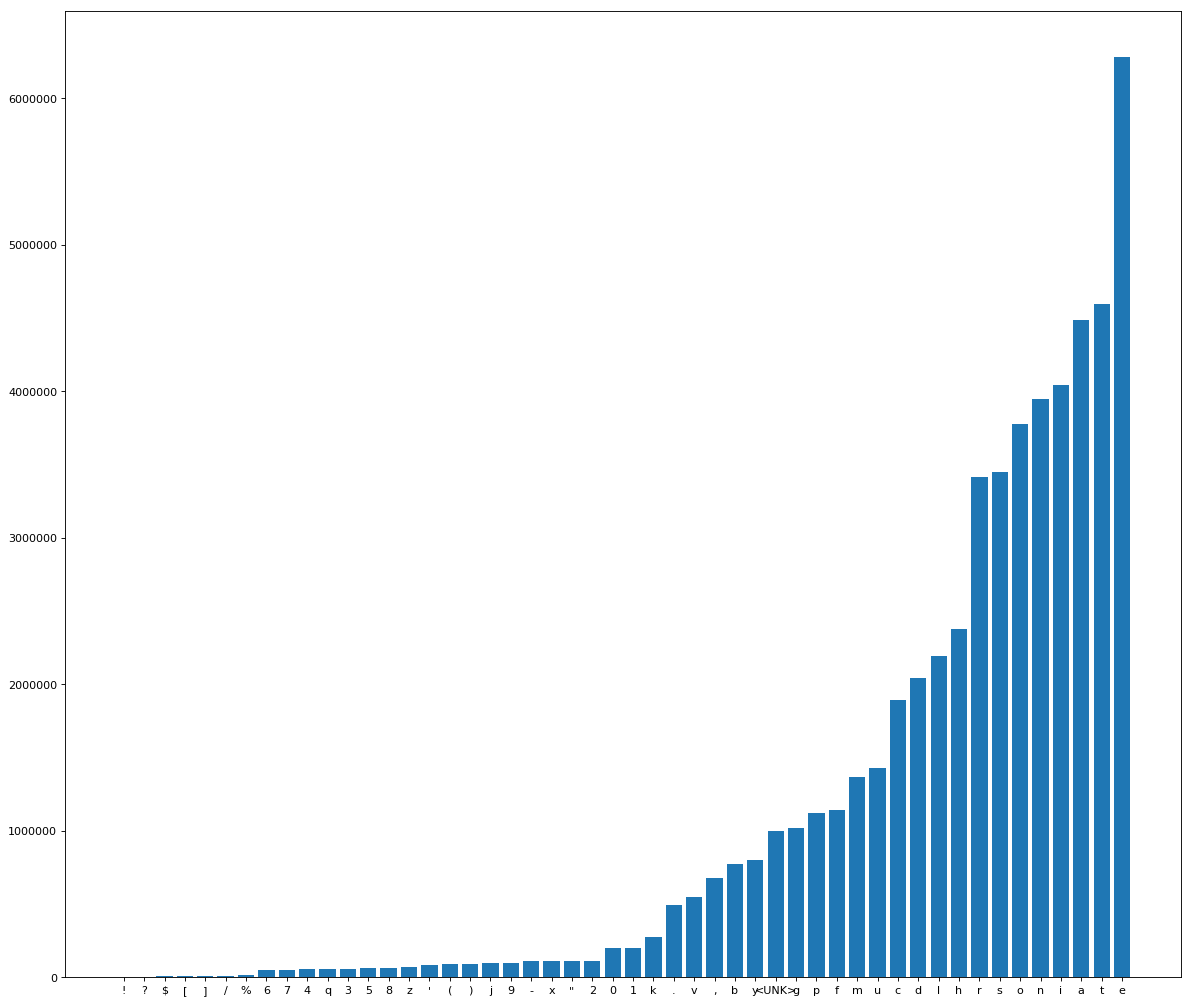

In [9]:
# Plot histogram
fig=plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
# plt.yscale('log')
plt.bar(sorted_names, sorted_values)

## Visualizing word lengths

The next important part will be to get a sense of how long the words are so we can set a max length on our representations.

In [16]:
len_counts = defaultdict(int)
i, print_every = 0, 10000
with io.open(train_context_file, encoding="utf-8") as f:
    for line in f:
        i += 1 
        for token in line.split(" "):
            len_counts[len(token)] += 1
        if i % print_every == 0:
            print "Processed %d examples..." % (i)
        
names = list(len_counts.keys())
values = list(len_counts.values())
# sorted_names = [name for _,name in sorted(zip(values,names))]
# sorted_values = sorted(values)

Processed 10000 examples...
Processed 20000 examples...
Processed 30000 examples...
Processed 40000 examples...
Processed 50000 examples...
Processed 60000 examples...
Processed 70000 examples...
Processed 80000 examples...


<BarContainer object of 36 artists>

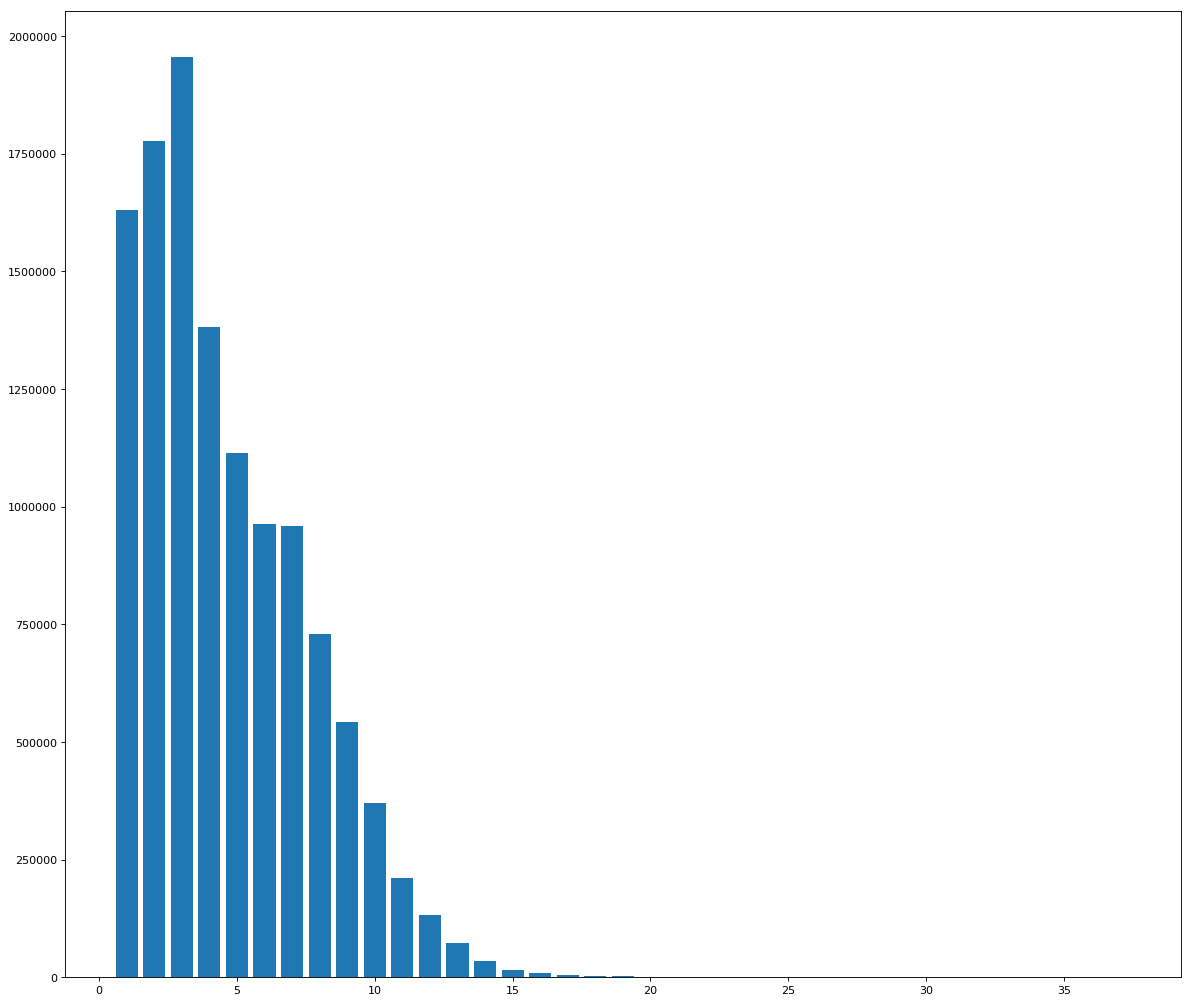

In [17]:
# Plot histogram
fig=plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
# plt.yscale('log')
plt.bar(names, values)

## Conclusions

As a result of this analysis, we can see that the set of 50 above words is reasonable, and also we can set a max_word_length to 15 that will roughly capture all words in the vocabulary.